# <font color="#9932CC" size="10"><b>ch10. Pandas(데이터프레임,시리즈)</b></font>

# 1절. 판다스 패키지 
- 데이터 분석을 위해 반드시 알아야 할 패키지. 넘파이를 기반으로 하며, 다른 라이브러리와 잘 통합되어 설계됨.
- 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터프레임을 제공
- 결측치 처리, 크기변경(열삭제/추가), 행삭제/추가, 데이터 정렬, 분할, 병합, 통계처리, 부분데이터 추출, 파일입출력, 레이블링, 시각화용이, .....
  

In [6]:
import numpy as np
np.pi

3.141592653589793

In [7]:
import pandas as pd
pd.__version__

'2.2.2'

In [5]:
data = pd.read_json('data/ch10_member1.json', encoding = 'CP949') #티폴트가 UTF-8, readjson은 알아서 닫아줘서 close 불필요
print(type(data))
data

<class 'pandas.core.frame.DataFrame'>


,name,age,email,address
0,홍길동,20,hong@hong.com,서울
1,김김김,25,kim@hong.com,경기
2,박길동,30,park@hong.com,제주


In [13]:
data = pd.read_json("data/ch10_member2.json",encoding='utf-8') #UTF-8로 Read
data

,name,age,email,address
0,홍길동,20,hong@hong.com,서울
1,김김김,25,kim@hong.com,경기
2,박길동,30,park@hong.com,제주


In [9]:
member1 = pd.read_csv('data/ch09_member1.csv', header=None,names=['name','age','email','address'],encoding='utf-8')

In [10]:
member1

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,김길남,41,gil@hong.com,서울시 강남구
3,진성빈,22,jean@bean.com,서울시 강서구
4,신승빈,35,bean@bean.com,서울시 강북구


# 2절. 데이터프레임 만들기
## 2.1 딕셔너리를 이용해서 데이터프레임 만들기

In [18]:
d = {'name':['홍길동','신길동'],'age':[20,30]}
df = pd.DataFrame(data=d)
df

,name,age
0,홍길동,20
1,신길동,30


## 2.2 리스트를 이용해서 데이터프레임 만들기

In [19]:
d = [{'name':'홍길동', 'age':20}, {'name':'신길동','age':30}]
df = pd.DataFrame(data=d)
df

,name,age
0,홍길동,20
1,신길동,30


## 2.3 read_csv()

In [20]:
df = pd.read_csv('data/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',encoding='cp949')

In [25]:
df.shape #행과 열 출력

(17, 22)

In [26]:
df.head(2) #상위 2줄

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


In [29]:
pd.options.display.max_columns #최대 데이터 프레임의 표현될 수 있는 columns, 22개중 20개밖에 출력안됨..
pd.options.display.max_columns=22 #바꿔줄수있음

In [31]:
df.sample() #이제 다 보임

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
11,충남,6365,6365,6379,6287,6552,6591,6644,6805,6914,6882,6831,6940,6989,6976,6980,7161,7017,6975,6939,6935,6942


## 2.4 sklearn, statsmodels, searborn 등의 라이브러리에서 데이터프레임 불러오기

In [69]:
import statsmodels.api as sm
iris = sm.datasets.get_rdataset("iris", package = "datasets").data
iris.tail() #끝 5행

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# 3절. 이름(열,행) 지정하기

In [70]:
import pandas as pd
member_df = pd.read_csv('data/ch09_member1.csv',header=None)
member_df

,0,1,2,3
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,김길남,41,gil@hong.com,서울시 강남구
3,진성빈,22,jean@bean.com,서울시 강서구
4,신승빈,35,bean@bean.com,서울시 강북구


In [50]:
# 열 이름 지정하기
member_df.columns = ['name','age','email','address']
member_df

,name,age,email,address
0,박길서,33,park@hong.com,서울시 강서구
1,김길남,41,gil@hong.com,서울시 강남구
2,진성빈,22,jean@bean.com,서울시 강서구
3,신승빈,35,bean@bean.com,서울시 강북구


In [42]:
member_df = pd.concat([member_df,member_df])
member_df

,name,age,email,address
0,박길서,33,park@hong.com,서울시 강서구
1,김길남,41,gil@hong.com,서울시 강남구
2,진성빈,22,jean@bean.com,서울시 강서구
3,신승빈,35,bean@bean.com,서울시 강북구
0,박길서,33,park@hong.com,서울시 강서구
1,김길남,41,gil@hong.com,서울시 강남구
2,진성빈,22,jean@bean.com,서울시 강서구
3,신승빈,35,bean@bean.com,서울시 강북구


In [51]:
member_df.index

RangeIndex(start=0, stop=4, step=1)

In [52]:
member_df.index = range(len(member_df))

In [53]:
member_df

,name,age,email,address
0,박길서,33,park@hong.com,서울시 강서구
1,김길남,41,gil@hong.com,서울시 강남구
2,진성빈,22,jean@bean.com,서울시 강서구
3,신승빈,35,bean@bean.com,서울시 강북구


In [54]:
# name을 행이름
# member_df = member_df.set_index("name") #inplace = False 적용된 내용 return
member_df.set_index("name", inplace = True) 

In [55]:
member_df

,age,email,address
name,,,
박길서,33,park@hong.com,서울시 강서구
김길남,41,gil@hong.com,서울시 강남구
진성빈,22,jean@bean.com,서울시 강서구
신승빈,35,bean@bean.com,서울시 강북구


In [56]:
# 행이름을 columns에 편입시키기 
#member_df = member_df.reset_index()  #reset 적용한 것을 return
member_df.reset_index(inplace=True) #이러면 바로적용 

In [57]:
member_df["name"]  #1차원 데이터 series

0    박길서
1    김길남
2    진성빈
3    신승빈
Name: name, dtype: object

In [59]:
member = member_df.loc[0]
print(type(member))
member

<class 'pandas.core.series.Series'>


name                 박길서
age                   33
email      park@hong.com
address          서울시 강서구
Name: 0, dtype: object

In [61]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     4 non-null      object
 1   age      4 non-null      int64 
 2   email    4 non-null      object
 3   address  4 non-null      object
dtypes: int64(1), object(3)
memory usage: 260.0+ bytes


In [64]:
#타입 바꾸기
member_df['age']=member_df['age'].astype('float64') #열의 타입을 변경

In [65]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     4 non-null      object 
 1   age      4 non-null      float64
 2   email    4 non-null      object 
 3   address  4 non-null      object 
dtypes: float64(1), object(3)
memory usage: 260.0+ bytes


# 4절. 부분 데이터 조회
- 특정열, 특정행, 특정행의 특정열, 특정조건의 행 모든열, 특정조건의 행의 특정열

In [10]:
member = pd.read_csv("data/ch09_member2.csv")
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,김길남,41,gil@hong.com,서울시 강남구
3,진성빈,22,jean@bean.com,서울시 강서구
4,신승빈,35,bean@bean.com,서울시 강북구


In [67]:
#특정 data assemble 

## 4.1 단일열 조회

In [73]:
member['name'] #시리즈, 이건 데이터프레임이 아님 

0    홍길동
1    박길서
2    김길남
3    진성빈
4    신승빈
Name: name, dtype: object

In [75]:
member['name'].to_frame() #프레임으로

,name
0,홍길동
1,박길서
2,김길남
3,진성빈
4,신승빈


## 4.2 loc[]을 이용한 이름(열,행)으로 조회
- 단일행, 여러행, 여러열, 행과 열을 동시에 접근할 때 사용해야함
- member.loc[행(행슬라이싱), 열(열슬라이싱)]

In [78]:
#단일행
member.loc[0] #시리즈로 가져옴

name                 홍길동
age                   20
email      hong@hong.com
address          서울시 강동구
Name: 0, dtype: object

In [80]:
#여러행
member.loc[0:5] #0행부터 5행까지 가져옴

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,부산시 강서구
2,김길남,41,gil@hong.com,서울시 강남구
3,진성빈,22,jean@bean.com,서울시 강서구
4,신승빈,35,bean@bean.com,서울시 강북구


In [83]:
#여러열
member.loc[:,'name':'email']  #앞항에는 무조건 행이 와야함, 모든행을 가져올거라 :

,name,age,email
0,홍길동,20,hong@hong.com
1,박길서,33,park@hong.com
2,김길남,41,gil@hong.com
3,진성빈,22,jean@bean.com
4,신승빈,35,bean@bean.com


In [93]:
member.loc[1:4,['name','email']]

,name,email
1,박길서,park@hong.com
2,김길남,gil@hong.com
3,진성빈,jean@bean.com
4,신승빈,bean@bean.com


In [96]:
member.loc[[1,4],['name','email','address']]
#loc사용시, index 이름과, column이름을 사용

,name,email,address
1,박길서,park@hong.com,부산시 강서구
4,신승빈,bean@bean.com,서울시 강북구


## 4.3 iloc[]을 이용한 숫자(인덱스)로 조회
- 몇번째 행부터, 몇번째 행앞까지, 몇번째 열인지, 숫자로 표현가능, 음수도 가능함

In [102]:
member.iloc[0:2,0:2] #0열부터 2열 앞까지

,name,age
0,홍길동,20
1,박길서,33


In [108]:
#맨 오른쪽 열을 제외하고 출력
member.iloc[:,:-1]

,name,age,email
0,홍길동,20,hong@hong.com
1,박길서,33,park@hong.com
2,김길남,41,gil@hong.com
3,진성빈,22,jean@bean.com
4,신승빈,35,bean@bean.com


In [109]:
#0,2,4,6 짝수번쨰 행의 모든 열 출력
member.iloc[::2]

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
2,김길남,41,gil@hong.com,서울시 강남구
4,신승빈,35,bean@bean.com,서울시 강북구


In [111]:
# member의 행순서를 역순 출력(맨 마지막 열 제회)
member.iloc[::-1,:-1]

,name,age,email
4,신승빈,35,bean@bean.com
3,진성빈,22,jean@bean.com
2,김길남,41,gil@hong.com
1,박길서,33,park@hong.com
0,홍길동,20,hong@hong.com


## 4.4 조건으로 조회하기

In [114]:
# 30살 이상의 데이터 출력
member.loc[member['age']>30] #인덱스 대신 조건

,name,age,email,address
1,박길서,33,park@hong.com,부산시 강서구
2,김길남,41,gil@hong.com,서울시 강남구
4,신승빈,35,bean@bean.com,서울시 강북구


In [116]:
# 강서구 사는 사람만 출력
# address.find('강서구') #찾고 없으면 -1 return
# member['address'].find 는 안됨, member['address']는 시리즈, 문자열에 find 사용해야함
# 시리즈에 문자함수 바로 못쓴다. https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling
member['address'].str.find('강서구')!=-1 #.str 만 적으면 됨


0    False
1     True
2    False
3     True
4    False
Name: address, dtype: bool

In [121]:
# address가 '강서구'인 data의 name, age, address를 출력하시오
member.loc[member['address'].str.find('강서구')!=-1,['name','age','address']]

,name,age,address
1,박길서,33,부산시 강서구
3,진성빈,22,서울시 강서구


In [122]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     5 non-null      object
 1   age      5 non-null      int64 
 2   email    5 non-null      object
 3   address  5 non-null      object
dtypes: int64(1), object(3)
memory usage: 292.0+ bytes


In [128]:
member.isna().sum() #결측치 여부 확인

name       0
age        0
email      0
address    0
dtype: int64

In [129]:
member.isna()

,name,age,email,address
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [139]:
#iris 
import seaborn as sns
iris_df = sns.load_dataset("iris")
# 0~49 setosa / 50~99 serisicolor / 100~149 virginica
iris_df.loc[0:49].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [142]:
#species가 versicolor인 데이터의 모든열
iris_df.loc[iris_df['species'] == 'versicolor'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [144]:
#species가 versicolor인 데이터의 맨 마지막 열을 제외한 데이터
iris_df.loc[iris_df['species']=='versicolor' , "sepal_length":"petal_width"].head(3)

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5


In [149]:
iris_df.iloc[:,:-1][iris_df['species']=='versicolor'].head()
#조건이 더 늘어나려면 &연산자가 필요함

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [157]:
#sepal.length가 6.2보다 크고, species가 versicolor 인 데이터를, 마지막열을 제거해서 출력
iris_df.iloc[:,:-1][(iris_df['species']=='versicolor')&(iris_df['sepal_length']>=6.2)]



,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
54,6.5,2.8,4.6,1.5
56,6.3,3.3,4.7,1.6
58,6.6,2.9,4.6,1.3
65,6.7,3.1,4.4,1.4
68,6.2,2.2,4.5,1.5
72,6.3,2.5,4.9,1.5
74,6.4,2.9,4.3,1.3


In [180]:
member

,name,age,email,address
0,홍길동,20.0,hong@hong.com,서울시 강동구
1,박길서,33.0,park@hong.com,부산시 강서구
2,김길남,41.0,gil@hong.com,서울시 강남구
3,진성빈,22.0,jean@bean.com,서울시 강서구


# 5절. 행,열 추가/제거

In [9]:
import numpy as np
member['major'] = ['컴공','전기','전자','기계',np.nan]

NameError: name 'member' is not defined

In [167]:
hobby = pd.DataFrame({'hobby' : ['놀기','자기','읽기','먹기','공부','명상']})

In [8]:
member = pd.concat([member, hobby], axis=1)
member

NameError: name 'member' is not defined

In [172]:
#열 지우기
#member.drop('hobby')
member.drop(['hobby','major'],axis=1, inplace=True)
#axis=1로 열 삭제 지정, axis 안넣으면 행삭제임

In [173]:
member

,name,age,email,address
0,홍길동,20.0,hong@hong.com,서울시 강동구
1,박길서,33.0,park@hong.com,부산시 강서구
2,김길남,41.0,gil@hong.com,서울시 강남구
3,진성빈,22.0,jean@bean.com,서울시 강서구
4,신승빈,35.0,bean@bean.com,서울시 강북구
5,NaN,NaN,NaN,NaN


In [176]:
member.drop(4,inplace=True)
member

,name,age,email,address
0,홍길동,20.0,hong@hong.com,서울시 강동구
1,박길서,33.0,park@hong.com,부산시 강서구
2,김길남,41.0,gil@hong.com,서울시 강남구
3,진성빈,22.0,jean@bean.com,서울시 강서구


In [177]:
#삭제후 인덱스 안맞으면 재정렬
member.index = range(len(member))

# 6절. 정렬

In [11]:
member.sort_index(ascending=False)#인덱스 정렬,axis=0 생략

,name,age,email,address
4,신승빈,35,bean@bean.com,서울시 강북구
3,진성빈,22,jean@bean.com,서울시 강서구
2,김길남,41,gil@hong.com,서울시 강남구
1,박길서,33,park@hong.com,부산시 강서구
0,홍길동,20,hong@hong.com,서울시 강동구


In [179]:
member.sort_index(ascending=True) 

,name,age,email,address
0,홍길동,20.0,hong@hong.com,서울시 강동구
1,박길서,33.0,park@hong.com,부산시 강서구
2,김길남,41.0,gil@hong.com,서울시 강남구
3,진성빈,22.0,jean@bean.com,서울시 강서구


In [187]:
# 특정 열의 값 기준 정렬
member.sort_values(by=['name','age'],ascending=True,inplace=True)
member

,name,age,email,address
2,김길남,41.0,gil@hong.com,서울시 강남구
1,박길서,33.0,park@hong.com,부산시 강서구
3,진성빈,22.0,jean@bean.com,서울시 강서구
0,홍길동,20.0,hong@hong.com,서울시 강동구


# 7절. 기초통계 분석
- count : NAN(결측치)를 제외한 갯수
- min
- max
- sum
- mean
- std : 표준편차
- var : 분산
- quantile : 분위수(1사분위수,2사분위수, 3사분위수)
- median : 중위수
- corr : 상관관계

In [195]:
iris_df.iloc[:,:-1].min(axis = 1)  #행마다 모든열의 최소값

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Length: 150, dtype: float64

In [202]:
iris_df.iloc[:,:-1].mean()
#만약 꽃 종류별로 통계를 구하고싶으면 그룹화를 해야함, 아직안배움 

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [203]:
iris_df.iloc[:,:-1].std()

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [206]:
iris_df.describe() #수치형 데이터의 데이터 갯수, 평균, 표준편차, 최소,최대, 분위수 다 나타내줌

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [208]:
iris_df['species'].describe()  #범주형데이터 갯수, 가짓수, 최다, 빈도

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [210]:
iris_df.describe(include='all') #데이터가 없는 것은 결측치로 나옴, 수치형과 범주형 데이터 모두 describe 하려면 all해야함

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [211]:
iris_df[iris_df['species'].isna()] #species가 결측치인 값을 출력

,sepal_length,sepal_width,petal_length,petal_width,species


# 8절. 그룹화

In [213]:
iris_df.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [214]:
iris_group = iris_df.groupby(['species'])
iris_group.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


# 연습문제

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
iris = sns.load_dataset("iris")
iris.sample(1)

,sepal_length,sepal_width,petal_length,petal_width,species
57,4.9,2.4,3.3,1.0,versicolor


In [45]:
# 시작전 설정
import matplotlib.pyplot as plt
%matplotlib inline
# 그래프 해상도 높임
%config InlineBackend.figure_format='retina'
#한글설정
plt.rc('font', family='Malgun Gothic')
#plt.rc('font', family='AppleGothic') #mac
plt.rc('axes', unicode_minus=False)
# 경고 메세지 안보이게
import warnings
warnings.filterwarnings(action='ignore')


In [216]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [224]:
x = iris.iloc[:,:-1]
y = iris.loc[:,'species'].to_frame()

In [227]:
temp = iris[:50]

In [229]:
temp.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [3]:
import seaborn as sns

<Axes: >

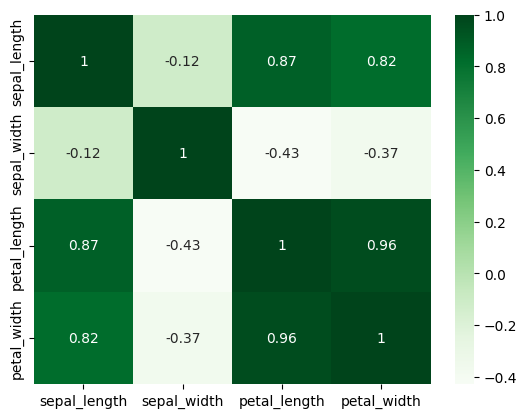

In [14]:

r = iris.iloc[:,:-1].corr()
sns.heatmap(r, annot=True, cmap = 'Greens')

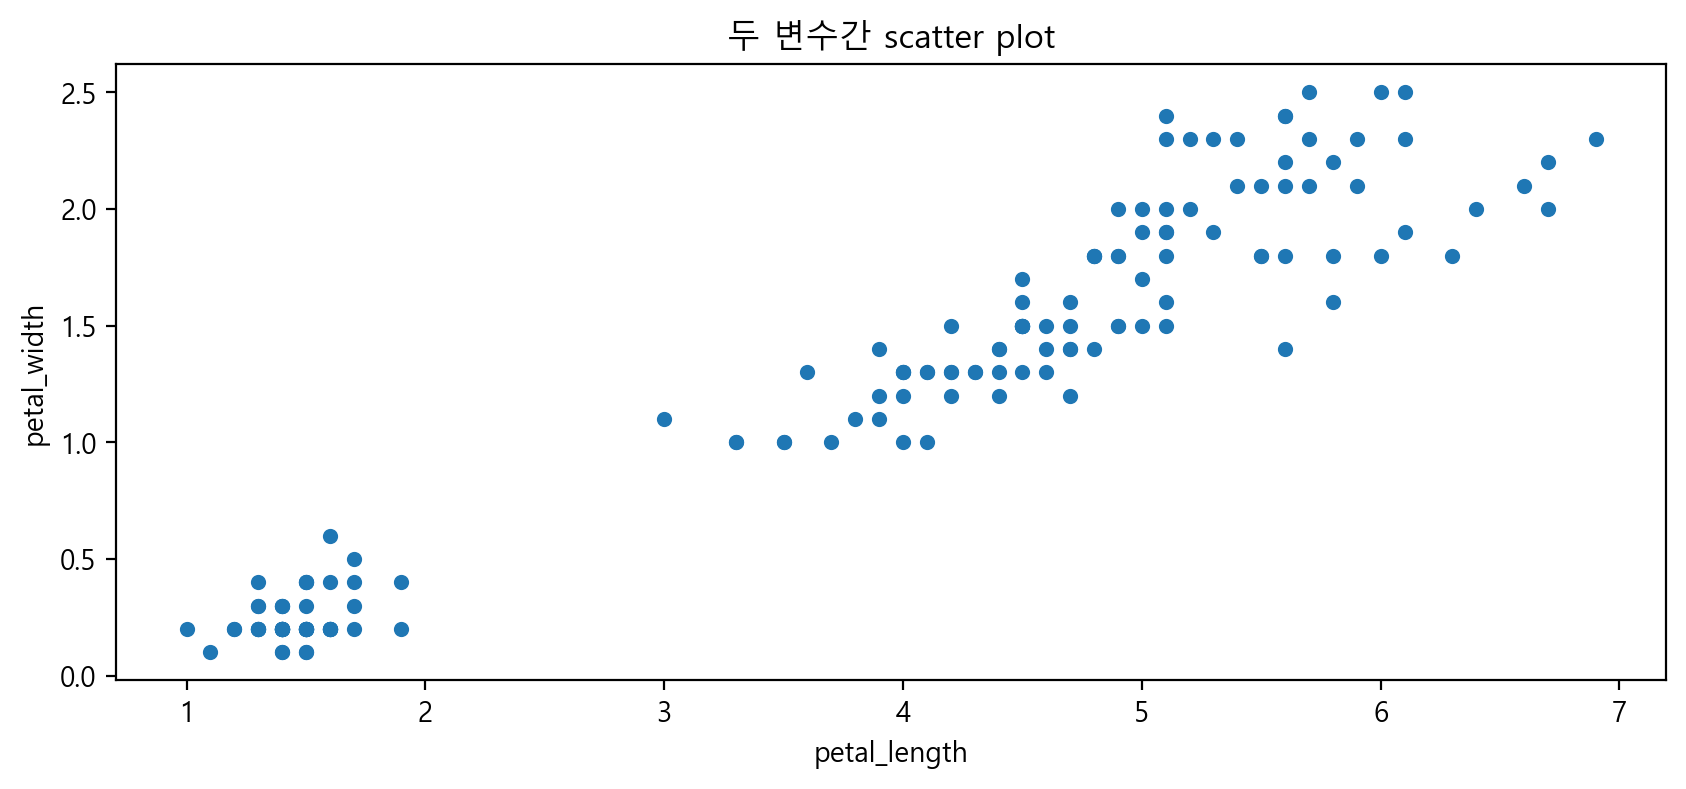

In [47]:
import matplotlib.pyplot as plt
iris.plot(kind= "scatter", x="petal_length",y="petal_width",figsize = (10,4))
plt.title('두 변수간 scatter plot')
plt.show()